## Take Home Challenge - Ultimate Technologies Inc.

## Part 1 - Exploratory Data Analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
json.load((open('logins.json')))

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [3]:
logins_df = pd.read_json(r'logins.json')
logins_df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [4]:
# Check for any null values
logins_df.isnull().any()

login_time    False
dtype: bool

In [5]:
# Look at data, found 92265 unique out of 93142 entries, there are duplicates!
print(logins_df.describe())
print(logins_df.info())

                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


In [6]:
# Identify the duplicated data
df_dup = logins_df[logins_df.duplicated(keep=False)==True]
df_dup

,login_time
347,1970-01-02 10:59:52
354,1970-01-02 10:59:52
427,1970-01-02 12:27:48
434,1970-01-02 12:27:48
503,1970-01-02 15:08:27
506,1970-01-02 15:08:27
521,1970-01-02 16:14:36
524,1970-01-02 16:14:36
669,1970-01-02 22:03:36
672,1970-01-02 22:11:16


In [7]:
# Create new DF without duplications
df_cleaned = logins_df[logins_df.duplicated(keep='first')==False]
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92265 entries, 0 to 93141
Data columns (total 1 columns):
login_time    92265 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
# Set index to time series
df_cleaned.set_index('login_time', inplace=True)

In [9]:
# Create count column
df_cleaned['counts']=1
df_cleaned.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,counts
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


### Exploratory Data Analysis of Time Series!

In [10]:
# Resample the dataframe with 15 minutes interval
freq_15 = df_cleaned.resample('15Min').count()
freq_15.columns = ['counts']
freq_15.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


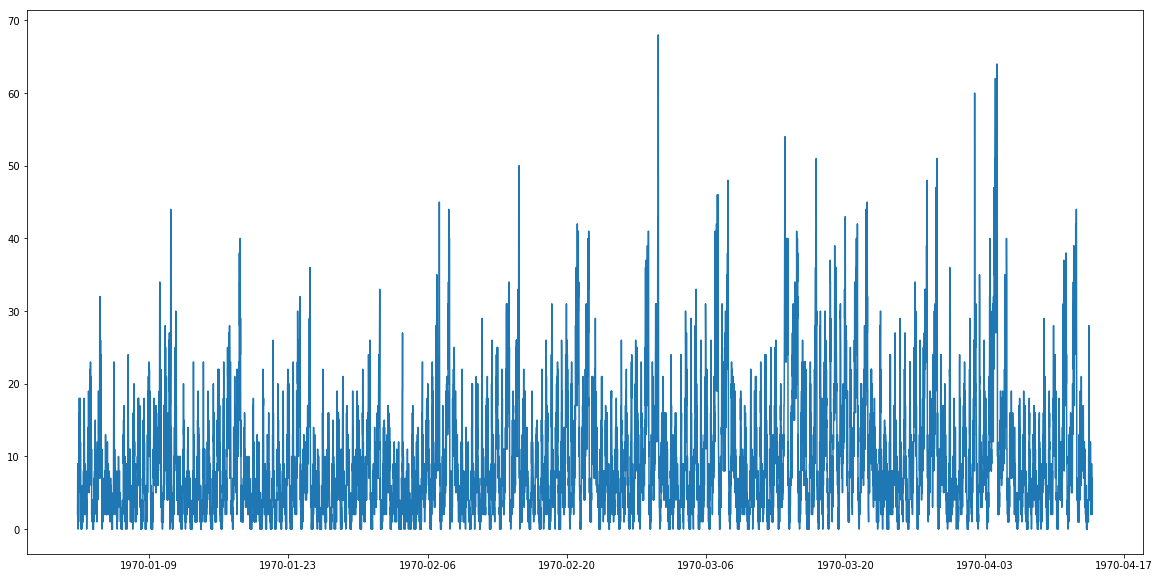

In [11]:
plt.rcParams['figure.figsize']=(20,10)
plt.plot(freq_15)

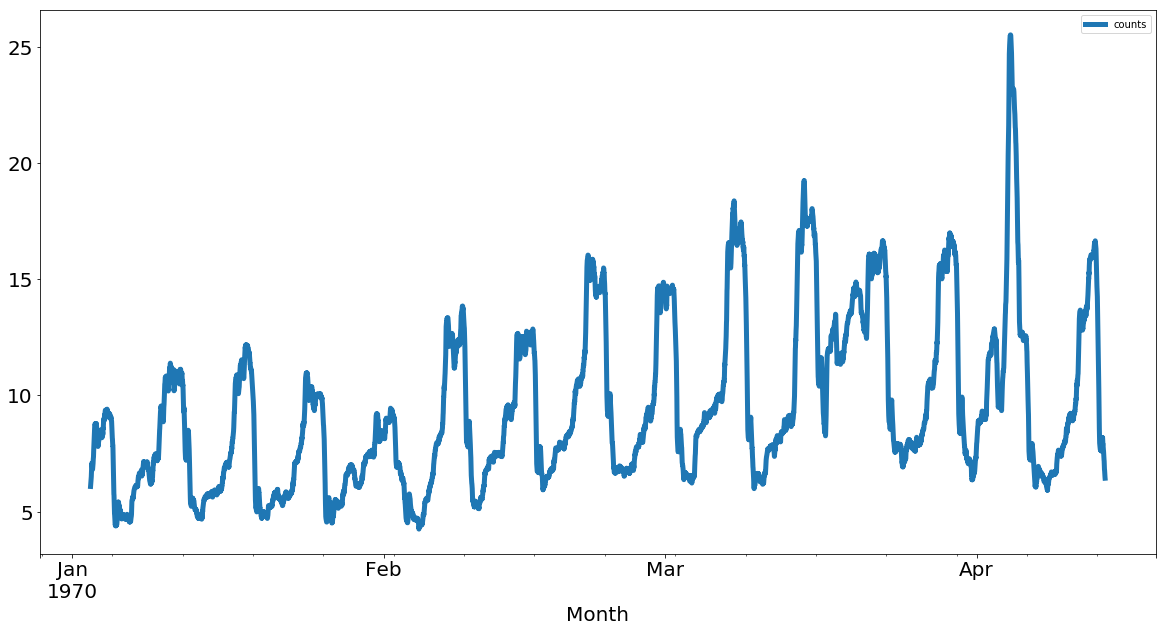

In [12]:
# Identifying Trends in Time Series using pandas rolling average method
freq_15.rolling(96).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

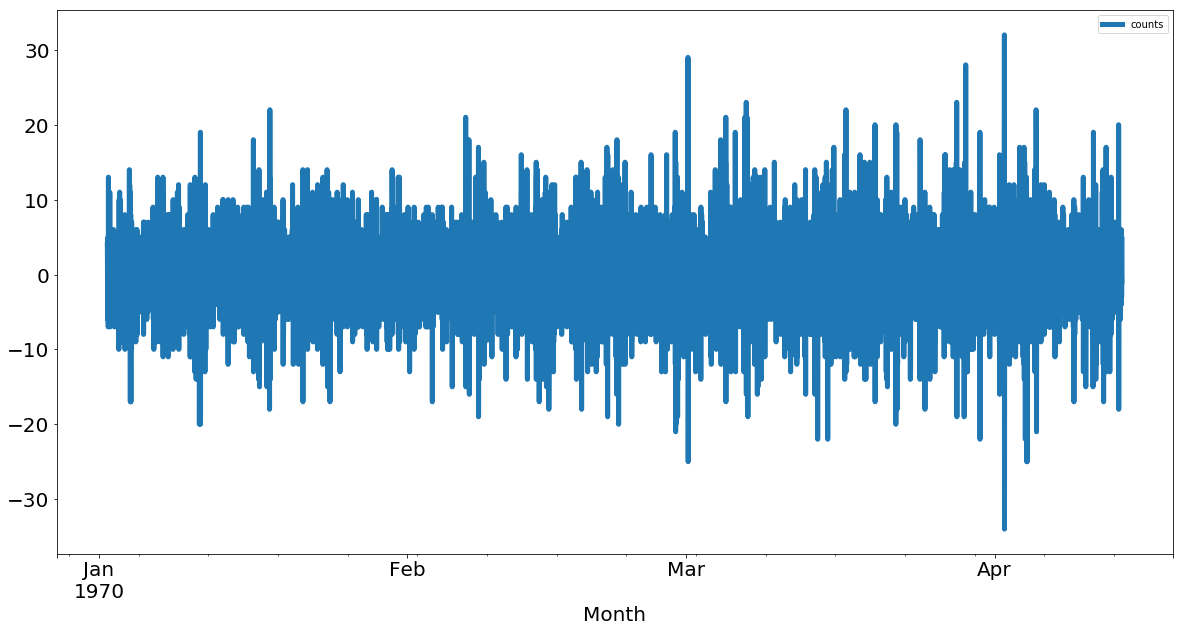

In [13]:
# Look into seasonality of the login counts
freq_15.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

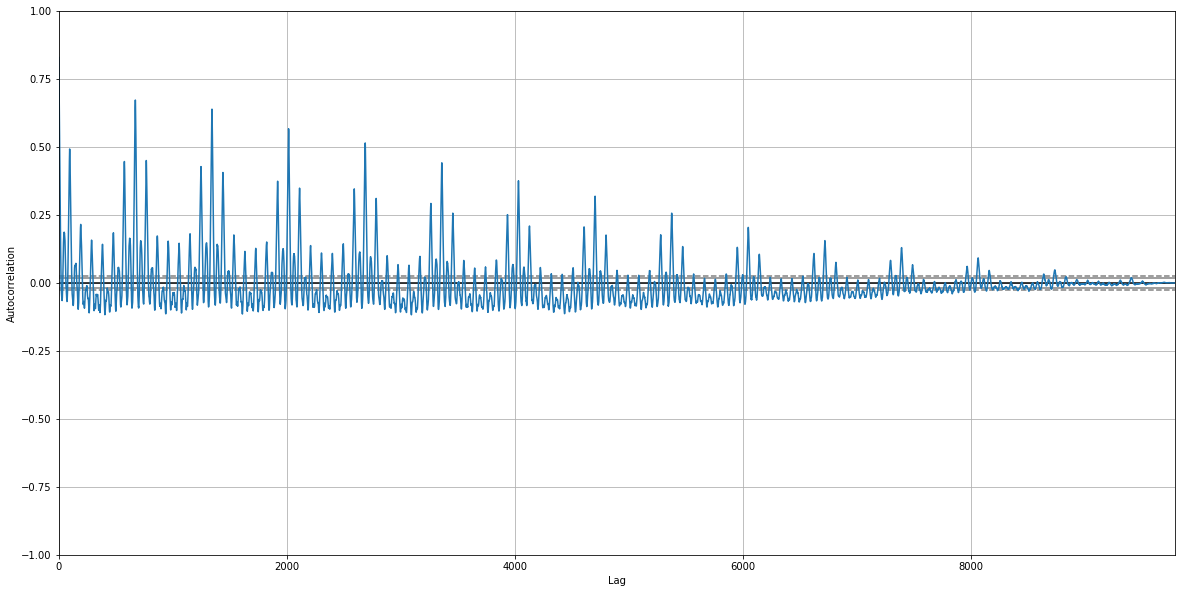

In [14]:
pd.plotting.autocorrelation_plot(freq_15)

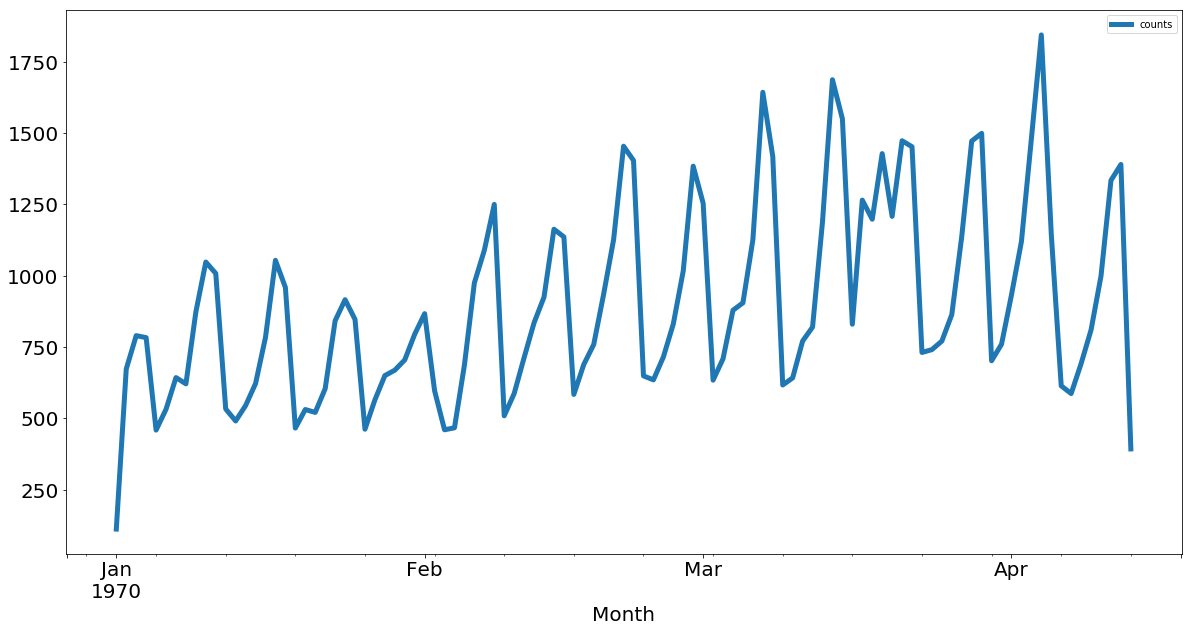

In [15]:
# Resample the dataset by 'days' and did a rolling average of 7 days. Trend is clearly increasing.
freq_d = df_cleaned.resample('d').count()
freq_d.rolling(1).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

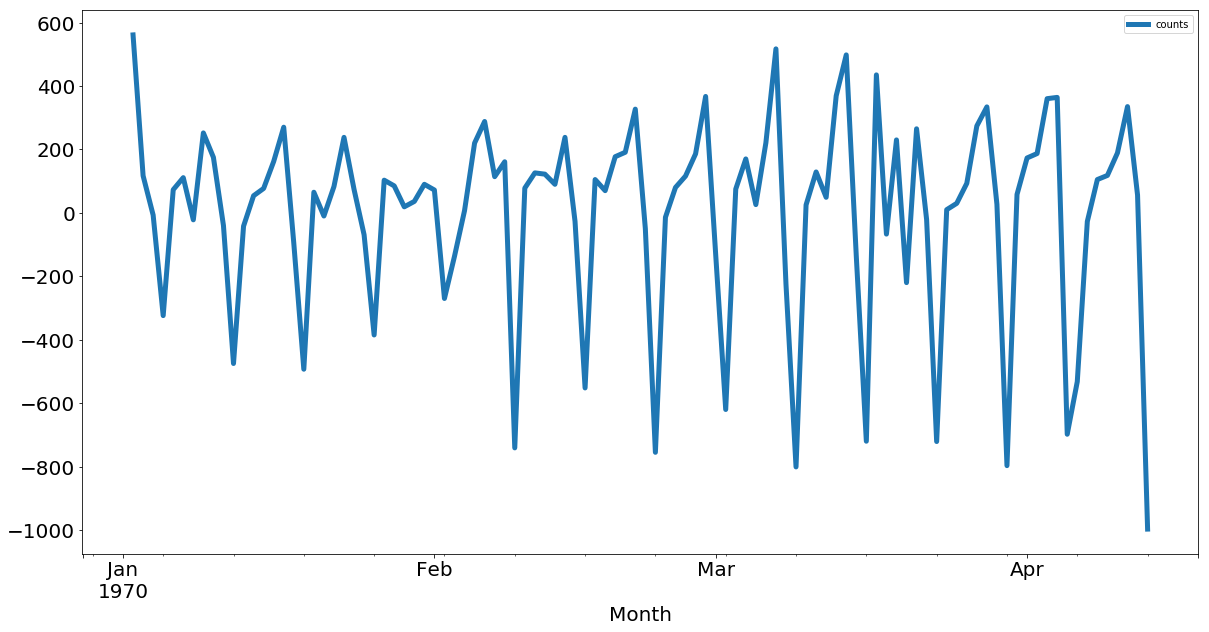

In [16]:
# Resample the dataset by 'months' this time
freq_d.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

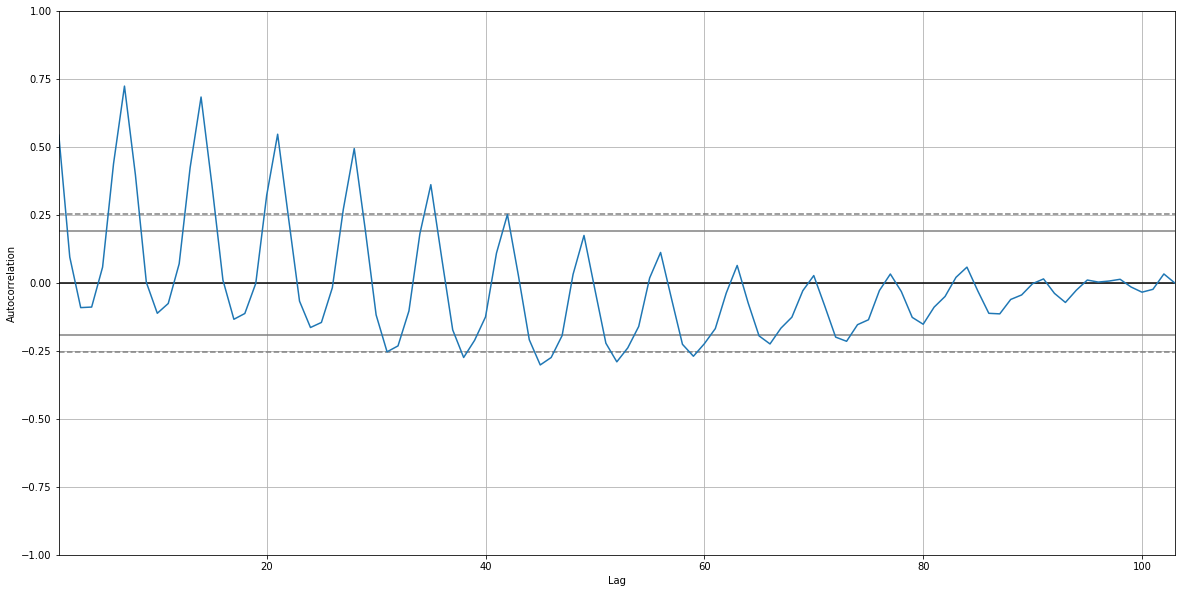

In [17]:
pd.plotting.autocorrelation_plot(freq_d)

In [18]:
# Resample the dataset by 'weeks' this time
freq_w = df_cleaned.resample('w').count()
freq_w.columns = ['counts']
freq_w.head()

,counts
login_time,
1970-01-04,2358
1970-01-11,5184
1970-01-18,4988
1970-01-25,4727
1970-02-01,4713


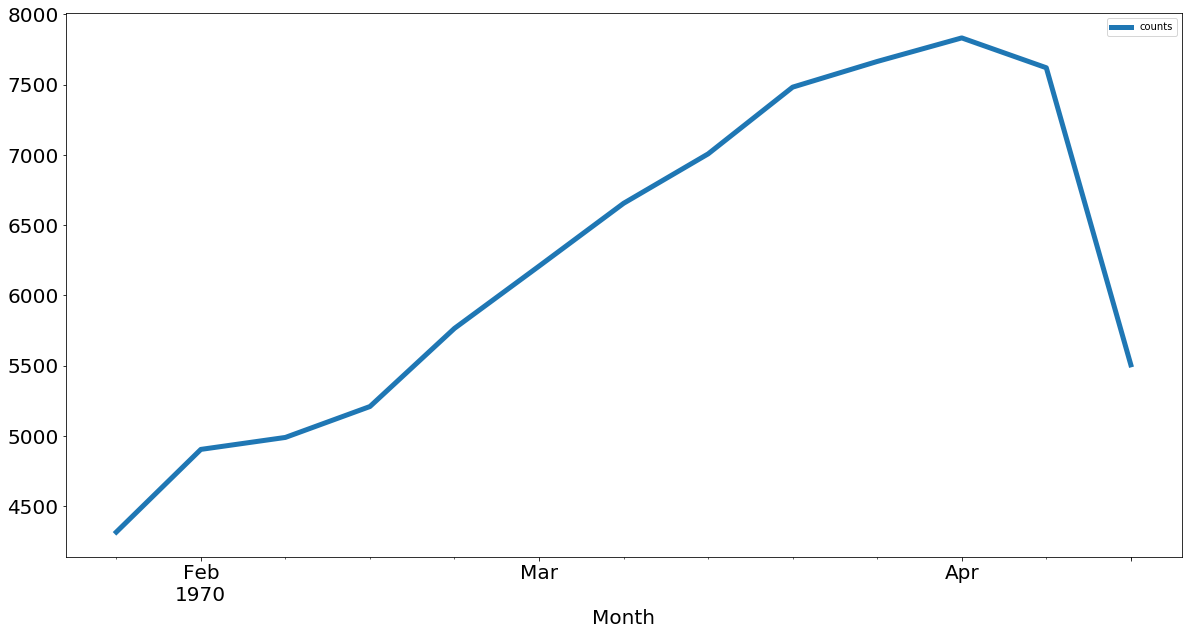

In [19]:
freq_w.rolling(4).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

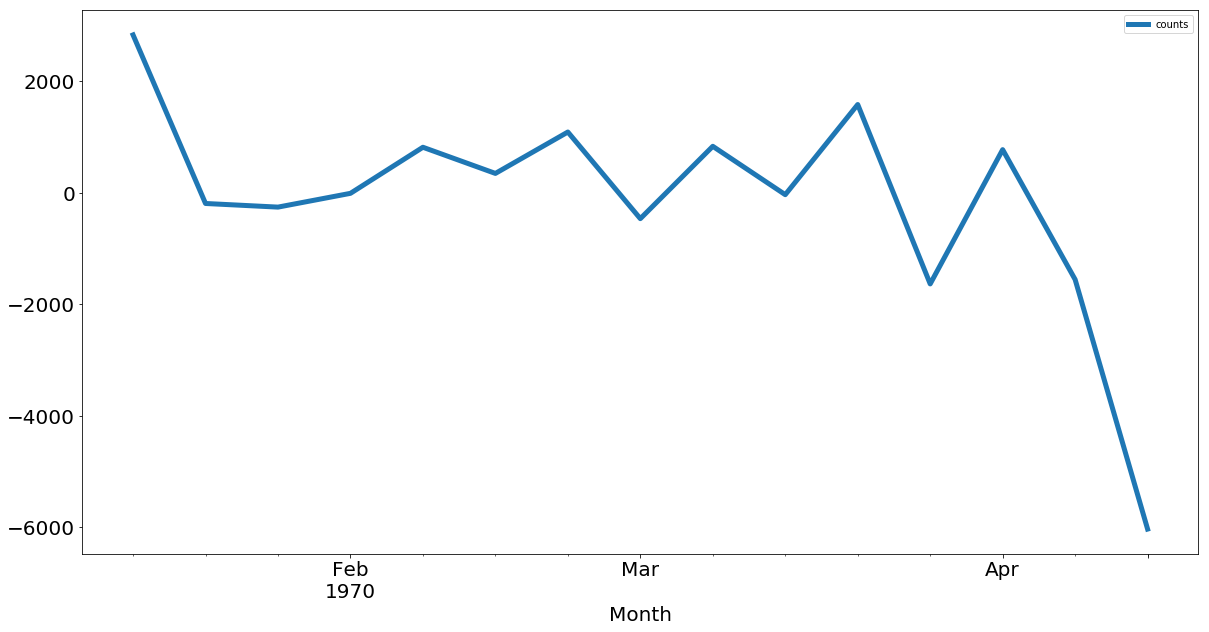

In [20]:
freq_w.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

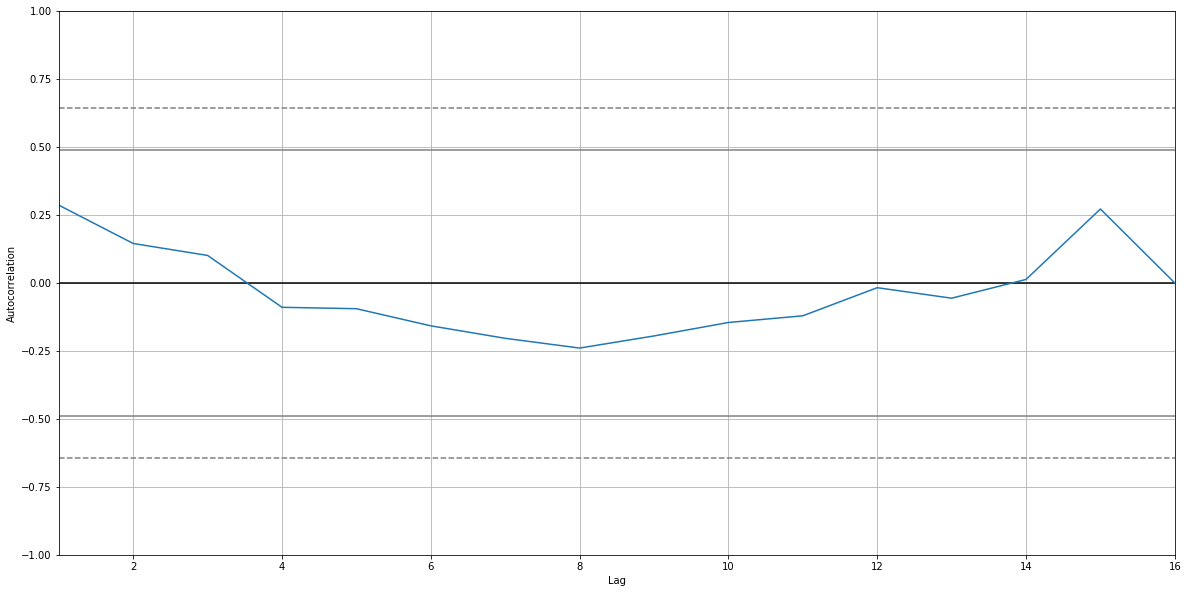

In [21]:
pd.plotting.autocorrelation_plot(freq_w)

### NL: Definitely a grow of retention from Jaunary to April.

## PART 2 - Experiment and Metrics Design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 

a. how you will implement the experiment 
b. what statistical test(s) you will conduct to verify the significance of the observation 
c. how you would interpret the results and p

1. NL: A key measure of success would be to see the increased flow of traffic between the two cities, and to identify and track the city of origin of which vehicle accessing the bridge. This metric will show the effect of the toll cost change and whether or not the program is working.
    
2. NL: 
a) To implement the experiment, place cameras or other means to track license plates of vehicle accessing the bridge in both directions. That will identify the volume of flow as well as the vehicle's origin. 
b) To verify the significance of the observation, a z-test (or a t-test if somehow there are less than 30 cars between the two cities...) and the null hypothesis would be no changes with traffic pattern before and after the toll change, where the alternate hypothesis is that there's a difference between the traffic pattern.
c) P-value greater than 0.05 indicate that we cannot reject the null hypothesis.

# PART 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we haveprovided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if theywere “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictorsfor retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provideddata for this analysis (a few sentences/plots describing your approach will suffice). Whatfraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be activein their 6th month on the system. Discuss why you chose your approach, whatalternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to

In [22]:
temp = json.load((open('ultimate_data_challenge.json')))

In [23]:
ultimate = pd.DataFrame(temp)
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [24]:
print(ultimate.describe())

           avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074764   
std        5.707357              0.446652              0.617338      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000           

In [25]:
# Notice the null-values in 'avg_rating_by_driver' and 'avg_rating_of_driver' and strangely 'Phone' as well.
print(ultimate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


In [26]:
ultimate.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

In [27]:
ultimate.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [28]:
# converting the two columns into datetime
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])

In [29]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [30]:
# Find the latest data entry from 'last_trip_date'
latest = max(ultimate['last_trip_date'])
print(latest)

2014-07-01 00:00:00


In [31]:
# Using the last date, find the latest 30 days with datetime.timedelta
days = [latest - datetime.timedelta(days=x) for x in range(0, 30)]

In [32]:
# Using list comprehension to map the last 30 days to the retention column to see who stayed
ultimate['retention'] = ultimate['last_trip_date'].map(lambda x: int(x in days))

In [33]:
# Finally, calculating the retention rate of the app.
ret_rate = sum(ultimate['retention'])/len(ultimate['retention'])
print(ret_rate)

0.3662


In [34]:
# Now to prepare the data for prediction, let's look at the cities.
ultimate.groupby('city').size()

city
Astapor           16534
King's Landing    10130
Winterfell        23336
dtype: int64

In [35]:
# looking at who uses phone, notice the the missing values for 'Phone'
print(ultimate.groupby('phone').size())
print(ultimate['phone'].isnull().sum())
phone_values = ultimate.drop_duplicates('phone')
print(phone_values['phone'])

phone
Android    15022
iPhone     34582
dtype: int64
396
0       iPhone
1      Android
134       None
Name: phone, dtype: object


In [36]:
# Copying into new Dataframe
ultimate_test = ultimate

In [37]:
#Label Encoding for City Column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ultimate_test['city'])
#list(le.classes_)
ultimate_test['city'] = le.transform(ultimate_test['city'])

In [38]:
#Using 'NoPhone' to fillna on phone column
ultimate_test['phone'].fillna('NoPhone', inplace=True)

In [39]:
#Label Encoding for phone column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ultimate_test['phone'])
#list(le.classes_)
ultimate_test['phone'] = le.transform(ultimate_test['phone'])

In [40]:
# Fillna of the missing values of avg_rating_by_driver with the mean value of the column
ultimate_test['avg_rating_by_driver'].fillna(ultimate_test['avg_rating_by_driver'].mean(), inplace=True)

In [41]:
# Fillna of the missing values of avg_rating_of_driver with the mean value of the column
ultimate_test['avg_rating_of_driver'].fillna(ultimate_test['avg_rating_of_driver'].mean(), inplace=True)

In [42]:
# With missing values filled, let's look at the correlations of the data, 
# focusing on the 'Retention' column at the bottom

correlations = ultimate.corr()
print(correlations)

                        avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
avg_dist                1.000000              0.079793              0.028508   
avg_rating_by_driver    0.079793              1.000000              0.101660   
avg_rating_of_driver    0.028508              0.101660              1.000000   
avg_surge              -0.081491              0.010498             -0.021653   
city                    0.041204             -0.073144             -0.069202   
phone                  -0.023074             -0.009493             -0.024378   
surge_pct              -0.104414              0.019964             -0.003290   
trips_in_first_30_days -0.136329             -0.039097             -0.011060   
ultimate_black_user     0.032310              0.009328             -0.001916   
weekday_pct             0.101652              0.020366              0.012587   
retention              -0.090279             -0.025595             -0.010082   

                        avg_surge      

In [43]:
# 11 columns of correlation data
correlations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, avg_dist to retention
Data columns (total 11 columns):
avg_dist                  11 non-null float64
avg_rating_by_driver      11 non-null float64
avg_rating_of_driver      11 non-null float64
avg_surge                 11 non-null float64
city                      11 non-null float64
phone                     11 non-null float64
surge_pct                 11 non-null float64
trips_in_first_30_days    11 non-null float64
ultimate_black_user       11 non-null float64
weekday_pct               11 non-null float64
retention                 11 non-null float64
dtypes: float64(11)
memory usage: 1.0+ KB


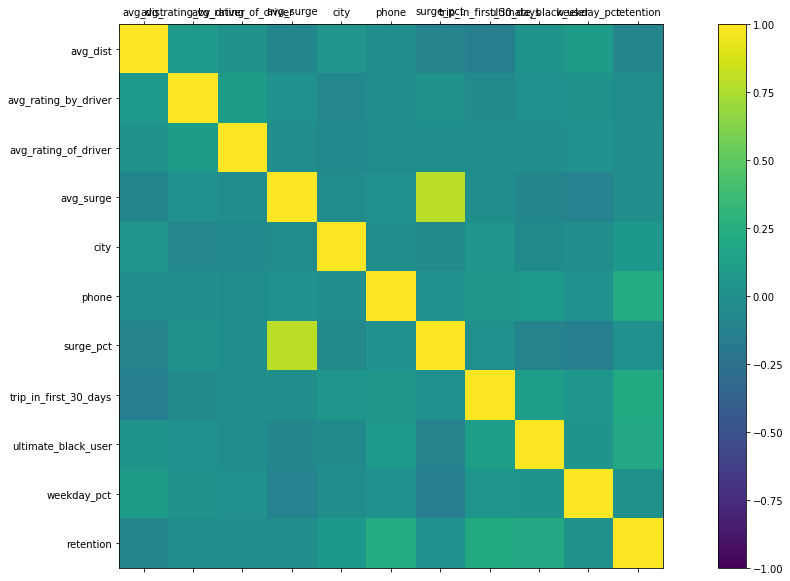

In [44]:
# To better visualize the correlation, plot them in matshow graph
columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
          'city', 'phone', 'surge_pct', 'trip_in_first_30_days', 'ultimate_black_user',
          'weekday_pct', 'retention']
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_color_cycle(['red', 'black', 'yellow'])
cax = ax.matshow(correlations, interpolation='nearest', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 11, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

In [45]:
# -1 because the latest row is retention
ultimate_corr = ultimate.corr()['retention'][:-1] 
golden_features_list = ultimate_corr.sort_values(ascending = False)
print("These are the {} strongest correlated values with Retention :\n{}".format(len(golden_features_list), golden_features_list))

These are the 10 strongest correlated values with Retention :
phone                     0.232640
trips_in_first_30_days    0.214728
ultimate_black_user       0.210259
city                      0.069058
weekday_pct               0.026413
surge_pct                 0.010612
avg_surge                -0.003567
avg_rating_of_driver     -0.010082
avg_rating_by_driver     -0.025595
avg_dist                 -0.090279
Name: retention, dtype: float64


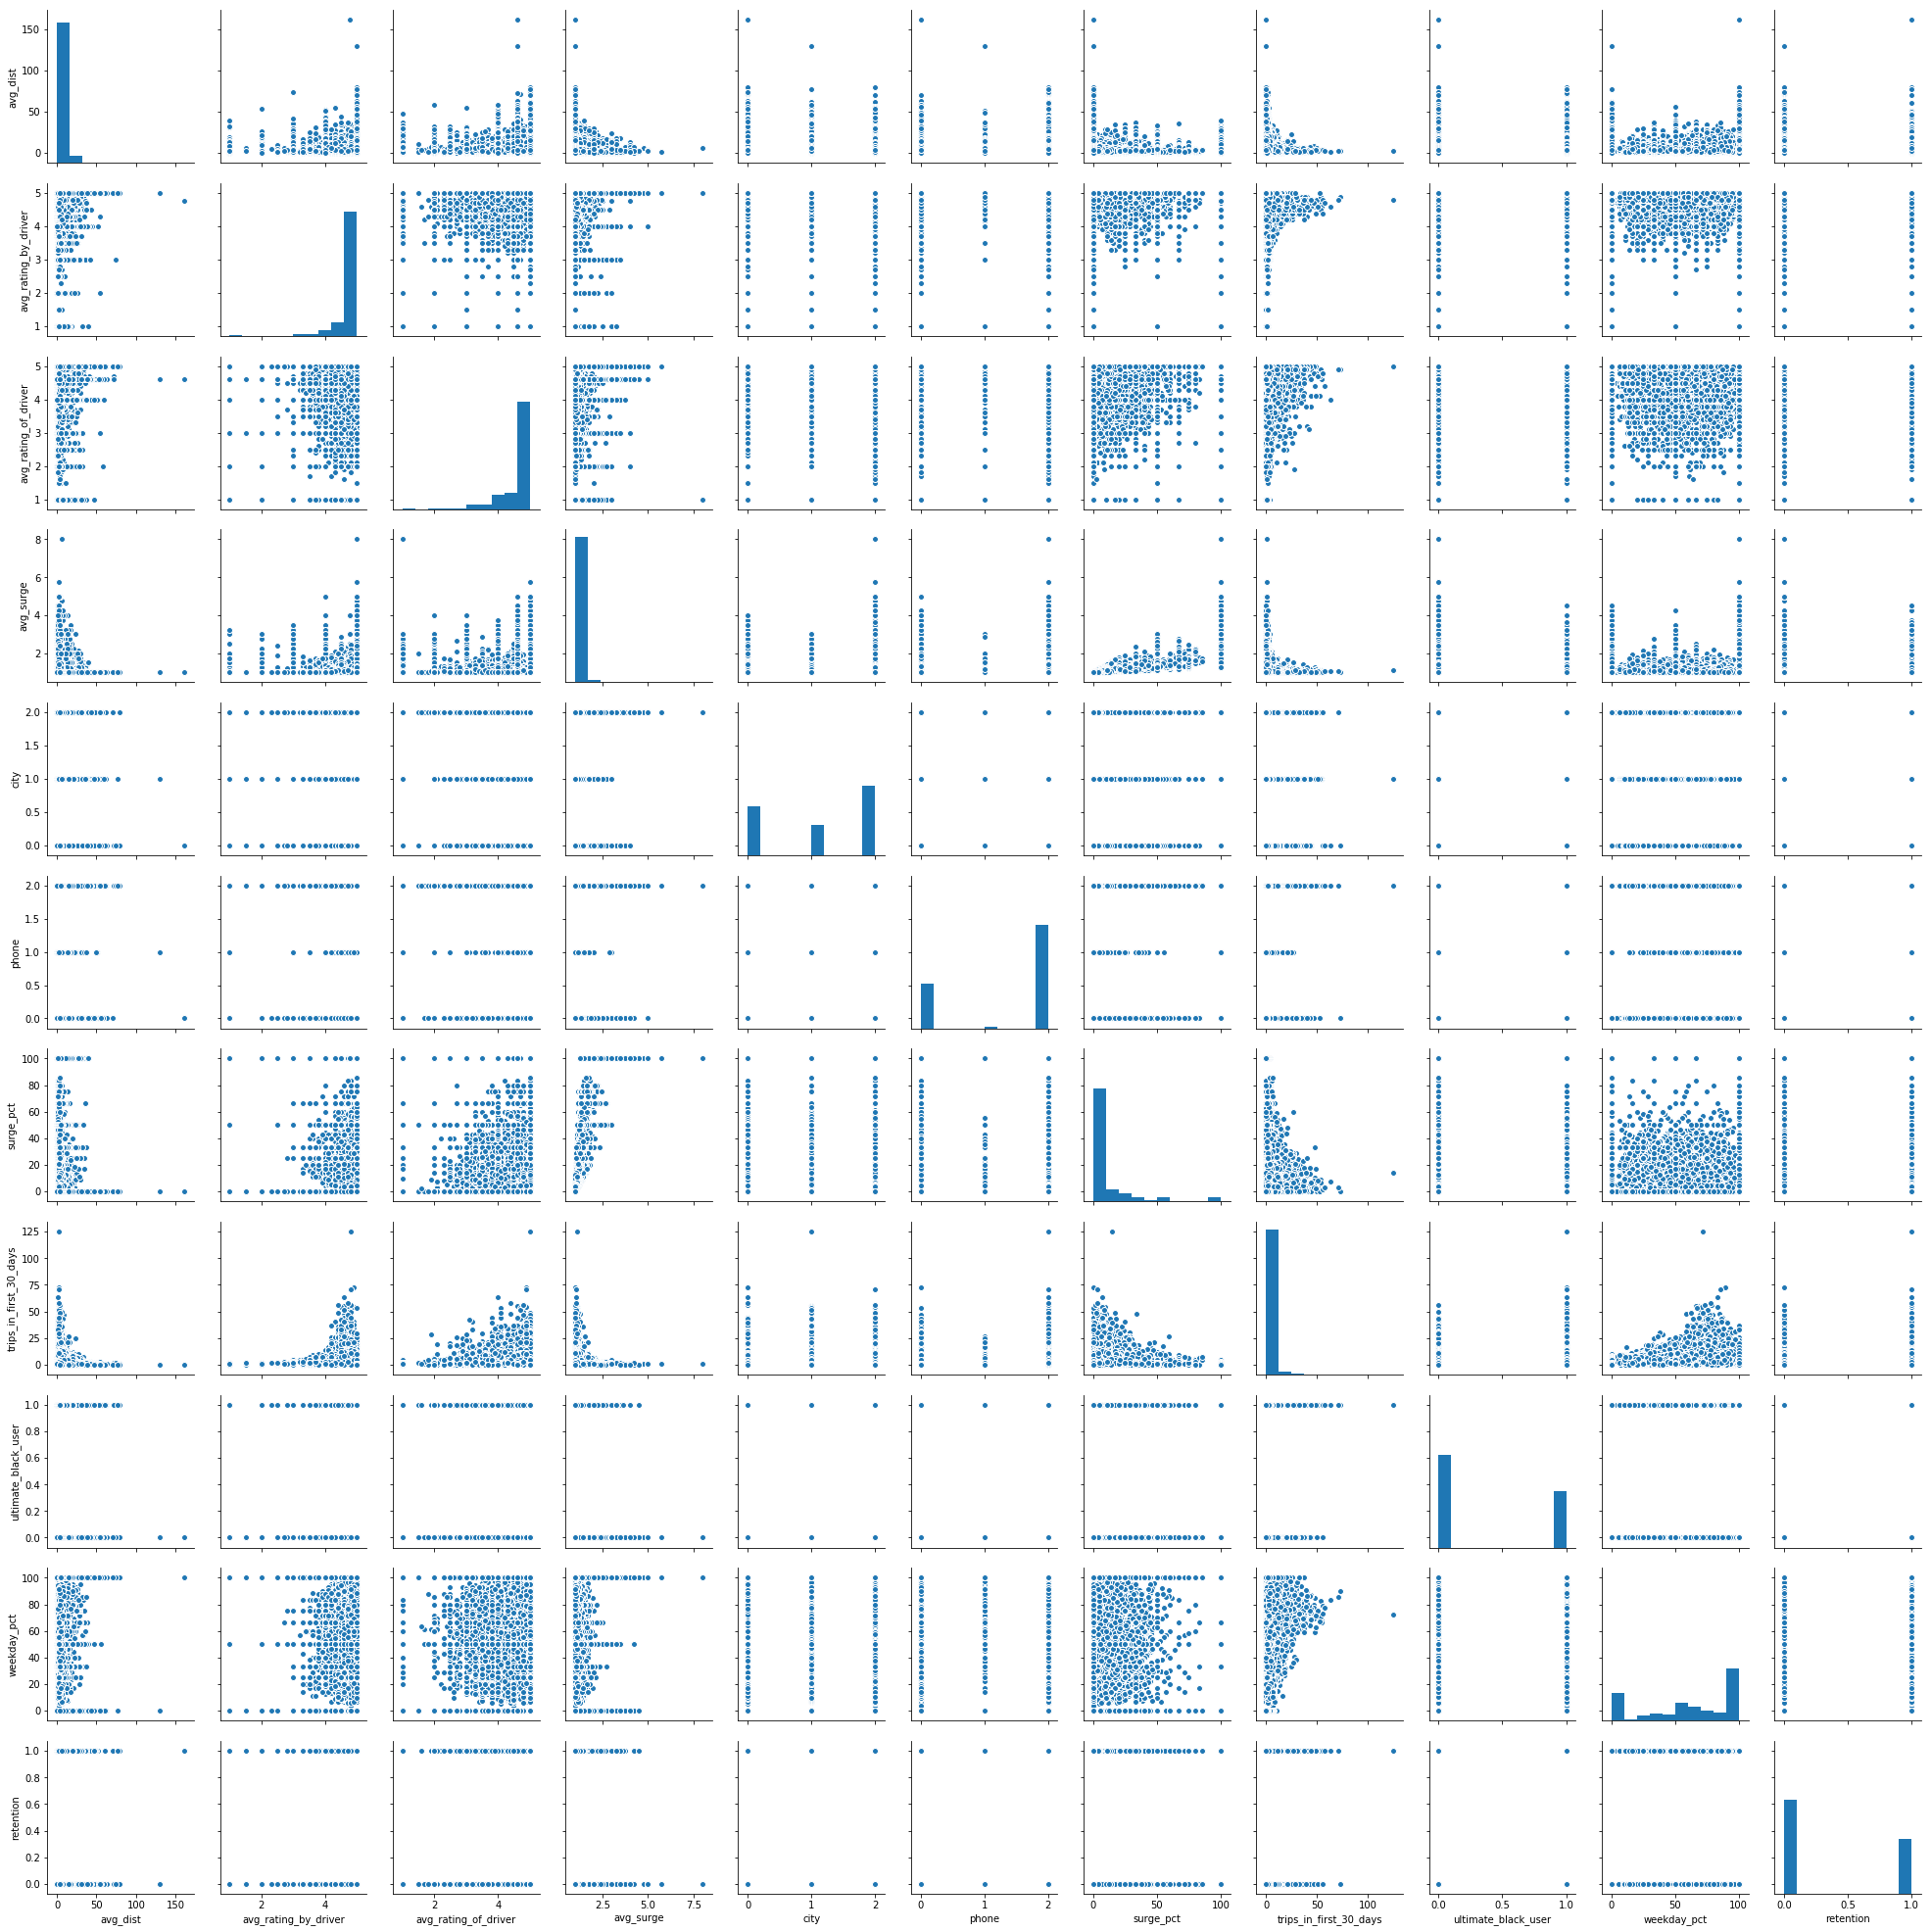

In [46]:
sns.pairplot(ultimate_test)

### Prepare Data for Machine Learning

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [48]:
ultimate_final = ultimate_test[['phone',
                               'trips_in_first_30_days',
                               'ultimate_black_user',
                               'city',
                               'weekday_pct',
                               'surge_pct', 'retention']]
ultimate_final.head()

,phone,trips_in_first_30_days,ultimate_black_user,city,weekday_pct,surge_pct,retention
0,2,4,True,1,46.2,15.4,1
1,0,0,False,0,50.0,0.0,0
2,2,3,False,0,100.0,0.0,0
3,2,9,True,1,80.0,20.0,1
4,0,14,False,2,82.4,11.8,0


In [49]:
# define the ML inputs 
x = ultimate_final.drop(['retention'], axis=1)
y = ultimate_final['retention']

In [50]:
# build a simple model based on the various features selected
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [51]:
# Defining number of folds
num_folds = 10
num_instances = len(x_train)
seed = 7

In [52]:
# Preparing models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))

results = []
names = []

# Model Evaluation
for name, model in models:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, 
                        cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.693624 (0.005537)
LDA: 0.692988 (0.005502)
NB: 0.714282 (0.006556)
KNN: 0.755812 (0.010247)
CART: 0.757459 (0.005353)


#### Decision Tree Classifier performed as the best algorithm.

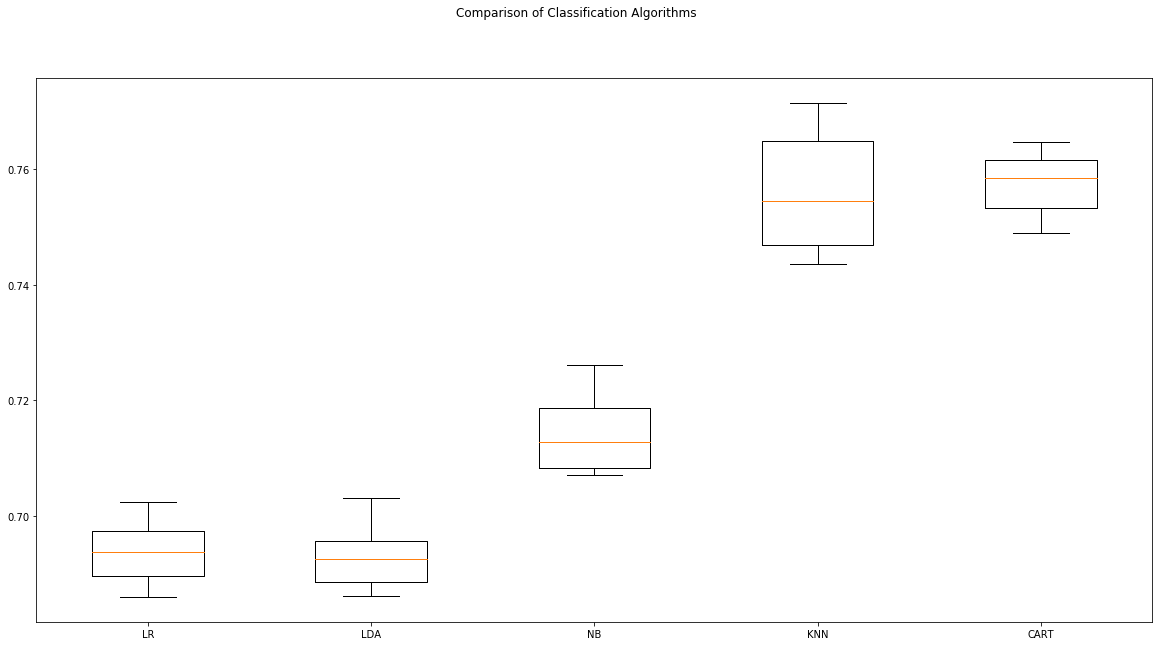

In [53]:
# Boxplot to compare the different algorithms
fig = plt.figure()
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
### Using Decision Tree Classifier
modelCART = DecisionTreeClassifier()

modelCART.fit(x_train, y_train)
modelCART.score(x_train, y_train)

# Collecting Coefficients
print('Feature_importance: \n', modelCART.feature_importances_)
print('n_features: \n', modelCART.n_features_)

y_pred = modelCART.predict(x_test)

Feature_importance: 
 [0.06966764 0.16685768 0.05333279 0.11001607 0.27969444 0.32043138]
n_features: 
 6


In [56]:
# Checking Accuracy of Model
accu = round(modelCART.score(x_train, y_train)*100, 2)
accu

86.16

In [57]:
# print the relevant score and conf matrix
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7598666666666667
[[4171  606]
 [1195 1528]]


In [61]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

modelCLF = GradientBoostingClassifier(n_estimators = 650, learning_rate = 0.75, max_depth = 1, random_state = 0)

# Training model and checking the score
modelCLF.fit(x_train, y_train)
modelCLF.score(x_train, y_train)  

# Predictions
y_predGBC=modelCLF.predict(x_test)

In [62]:
# Checking Accuracy of Model
accu = round(modelCLF.score(x_train, y_train)*100, 2)
accu

78.16

In [63]:
print(accuracy_score(y_test, y_predGBC))
print(confusion_matrix(y_test, y_predGBC))

0.7792
[[4195  582]
 [1074 1649]]


The GBC model has an accuracy score of 78%, and based on the confusion matrix, it shows that the model performed with false positive of 1078 counts.

